In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

# Download data
data = yf.download("IBM", start="2011-01-01", end="2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,140.736145,141.682602,140.669220,140.994263,85.510010,4815575
2011-01-04,141.070740,141.701721,140.191208,141.147232,85.602837,5292865
2011-01-05,140.860428,140.994263,140.277252,140.583176,85.260742,4871640
2011-01-06,140.659653,142.246658,140.363297,142.122375,86.194221,5260543
2011-01-07,142.246658,142.313583,140.478012,141.424469,85.770935,4325942


<Axes: xlabel='Date'>

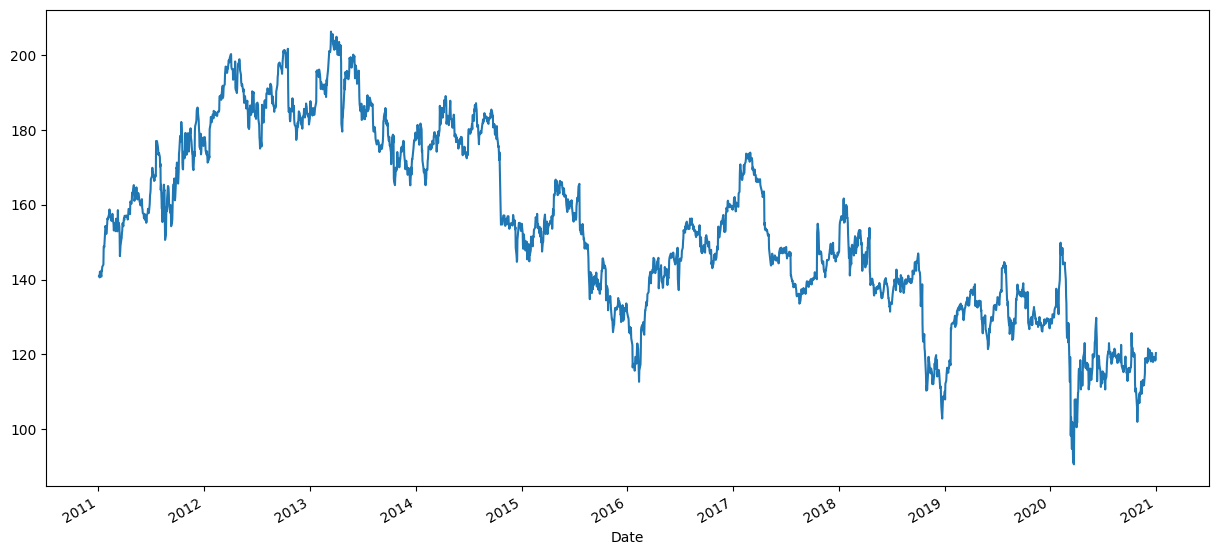

In [6]:
# Updating the header
# df.columns=["Date","Price"]
df=data["Close"]
df.head()
df.describe()
# df.set_index('Date',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Close'])

In [8]:
def adfuller_test(prices):
    result=adfuller(prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")


adfuller_test(data['Close'])

ADF Test Statistic : -1.29531756784504
p-value : 0.6313118000257228
#Lags Used : 25
Number of Observations : 2491
weak evidence against null hypothesis,indicating it is non-stationary 


In [9]:
data['First Difference'] = data['Close'] - data['Close'].shift(1)
data['Seasonal First Difference']=data['Close']-data['Close'].shift(12)
data.head()

,Open,High,Low,Close,Adj Close,Volume,First Difference,Seasonal First Difference
Date,,,,,,,,
2011-01-03,140.736145,141.682602,140.669220,140.994263,85.510010,4815575,NaN,NaN
2011-01-04,141.070740,141.701721,140.191208,141.147232,85.602837,5292865,0.152969,NaN
2011-01-05,140.860428,140.994263,140.277252,140.583176,85.260742,4871640,-0.564056,NaN
2011-01-06,140.659653,142.246658,140.363297,142.122375,86.194221,5260543,1.539200,NaN
2011-01-07,142.246658,142.313583,140.478012,141.424469,85.770935,4325942,-0.697906,NaN


In [10]:
adfuller_test(data['First Difference'].dropna())

ADF Test Statistic : -12.430513811447941
p-value : 3.9500372918389063e-23
#Lags Used : 24
Number of Observations : 2491
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


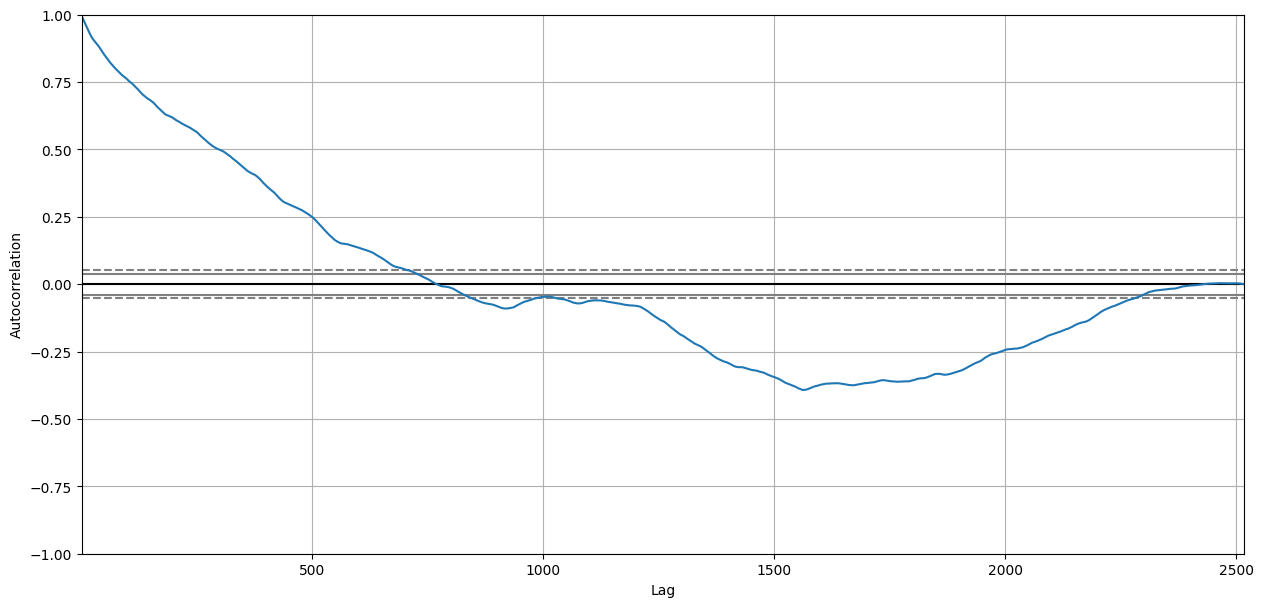

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])
plt.show()

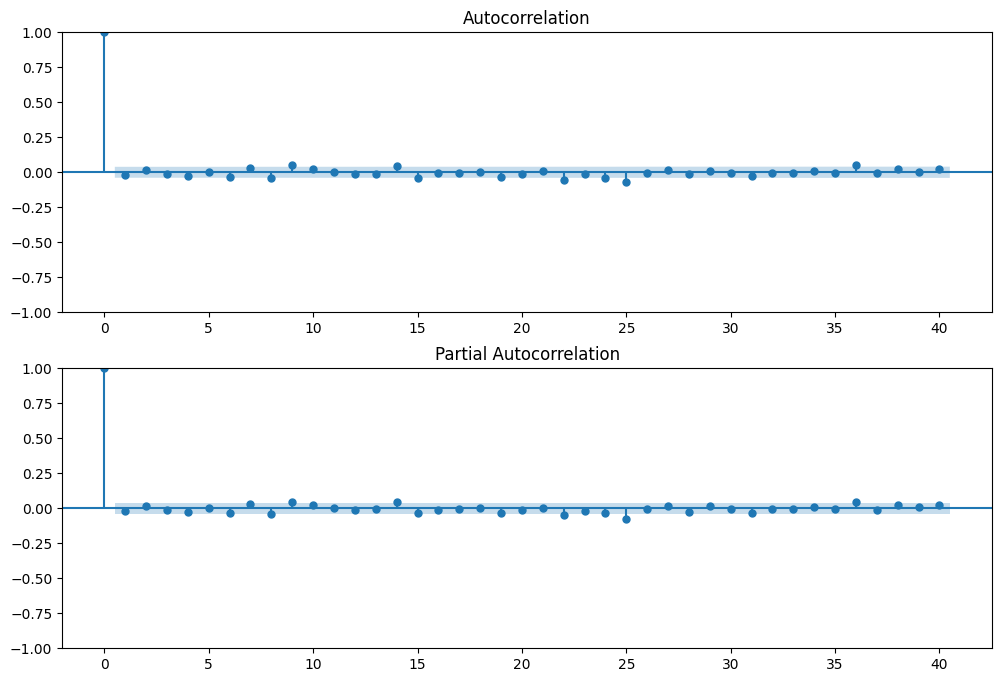

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['First Difference'].dropna(),lags=40,ax=ax2)

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame and 'Price' is the column you're using
model = ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2517
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5388.802
Date:                Wed, 09 Oct 2024   AIC                          10783.605
Time:                        06:22:48   BIC                          10801.096
Sample:                             0   HQIC                         10789.953
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9078      0.249     -3.642      0.000      -1.396      -0.419
ma.L1          0.9127      0.245      3.726      0.000       0.433       1.393
sigma2         4.2450      0.057     74.680      0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

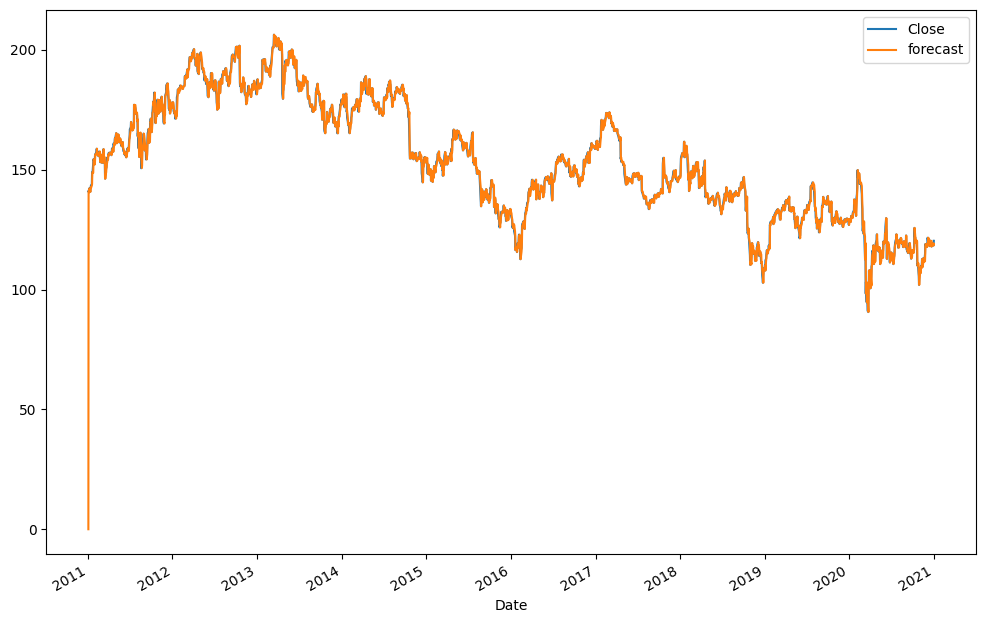

In [14]:
data['forecast']=model_fit.predict()
data[['Close','forecast']].plot(figsize=(12,8))

In [15]:
from sklearn.metrics import mean_squared_error

# Assuming 'Close' is the actual data and 'forecast' is the predicted data
mse = mean_squared_error(data['Close'], data['forecast'])

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12.14139181769259


In [20]:
import math

df=data

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,First Difference,Seasonal First Difference,forecast
Date,,,,,,,,,
2011-01-03,140.736145,141.682602,140.669220,140.994263,85.510010,4815575,NaN,NaN,0.000000
2011-01-04,141.070740,141.701721,140.191208,141.147232,85.602837,5292865,0.152969,NaN,140.994266
2011-01-05,140.860428,140.994263,140.277252,140.583176,85.260742,4871640,-0.564056,NaN,141.147951
2011-01-06,140.659653,142.246658,140.363297,142.122375,86.194221,5260543,1.539200,NaN,140.579846
2011-01-07,142.246658,142.313583,140.478012,141.424469,85.770935,4325942,-0.697906,NaN,142.132735


In [22]:
training_data_len = math.ceil(len(df) * .8)
training_data_len 
 
#Splitting the dataset
train_data = df[:training_data_len].iloc[:,:1] 
test_data = df[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(2014, 1) (503, 1)


In [23]:
# Selecting Open Price values
dataset_train = train_data.Open.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(2014, 1)

In [24]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(train_data)
 
print(scaled_train[:5])


[[0.36515186]
 [0.36841119]
 [0.36636252]
 [0.36440675]
 [0.37986594]]


In [25]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  

scaled_test = scaler.fit_transform(test_data)  
print(*scaled_test[:5])

[0.32642233] [0.36804878] [0.40276431] [0.42285434] [0.40951452]


In [26]:
X_train = []
y_train = []
for i in range(51, len(scaled_train)):
    X_train.append(scaled_train[i-51:i-1, 0])
    y_train.append(scaled_train[i-1:i+1, 0])
    if i <= 52:
        print(X_train)
        print(y_train)
        print()

[array([0.36515186, 0.36841119, 0.36636252, 0.36440675, 0.37986594,
       0.36859743, 0.3743714 , 0.37241578, 0.38405662, 0.38079715,
       0.38945796, 0.4214938 , 0.43332088, 0.4507357 , 0.44160921,
       0.47690452, 0.49981372, 0.49757866, 0.4940399 , 0.47662508,
       0.50391136, 0.51592469, 0.51368977, 0.51666981, 0.52225739,
       0.52914882, 0.53659897, 0.52058105, 0.52132617, 0.52318875,
       0.51117527, 0.51527291, 0.51499347, 0.5257963 , 0.51750797,
       0.50111757, 0.48081577, 0.49413294, 0.50623947, 0.51359658,
       0.47895319, 0.49748561, 0.51592469, 0.4991618 , 0.48146769,
       0.51657661, 0.52747248, 0.5066121 , 0.49506431, 0.45958275])]
[array([0.45185316, 0.42838523])]

[array([0.36515186, 0.36841119, 0.36636252, 0.36440675, 0.37986594,
       0.36859743, 0.3743714 , 0.37241578, 0.38405662, 0.38079715,
       0.38945796, 0.4214938 , 0.43332088, 0.4507357 , 0.44160921,
       0.47690452, 0.49981372, 0.49757866, 0.4940399 , 0.47662508,
       0.50391136, 0.51

In [27]:
X_test = []
y_test = []
for i in range(51, len(scaled_test)):
    X_test.append(scaled_test[i-51:i-1, 0])
    y_test.append(scaled_test[i-1:i+1, 0])
    if i <= 52:
        print(X_test)
        print(y_test)
        print()

[array([0.32642233, 0.36804878, 0.40276431, 0.42285434, 0.40951452,
       0.43362255, 0.41642556, 0.42365789, 0.43362255, 0.41722911,
       0.4607842 , 0.46126646, 0.59096748, 0.61121822, 0.61507552,
       0.61877198, 0.63789774, 0.63323677, 0.64046936, 0.64882679,
       0.63355819, 0.65380893, 0.65284467, 0.62600444, 0.60655725,
       0.63789774, 0.65171957, 0.68016716, 0.68418504, 0.69077453,
       0.69447124, 0.70973959, 0.69463183, 0.70925733, 0.72966891,
       0.72436509, 0.71761476, 0.70990017, 0.71857928, 0.72950807,
       0.70347151, 0.69945338, 0.67518477, 0.63661206, 0.66586307,
       0.70588229, 0.69832854, 0.70572145, 0.71954354, 0.72693671])]
[array([0.74509809, 0.73818692])]

[array([0.32642233, 0.36804878, 0.40276431, 0.42285434, 0.40951452,
       0.43362255, 0.41642556, 0.42365789, 0.43362255, 0.41722911,
       0.4607842 , 0.46126646, 0.59096748, 0.61121822, 0.61507552,
       0.61877198, 0.63789774, 0.63323677, 0.64046936, 0.64882679,
       0.63355819, 0.65

In [28]:

# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],2))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (1963, 50, 1) y_train : (1963, 2)


In [29]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],2))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (452, 50, 1) y_test : (452, 2)


In [30]:


# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


2024-10-09 06:24:07.382104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 06:24:07.382211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 06:24:07.534726: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 2,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 10, batch_size = 2)
regressor.summary()


Epoch 1/10
  5/982 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0896 

I0000 00:00:1728455363.636366     201 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1728455363.669457     201 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1728455363.672142     201 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1728455363.674765     201 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


982/982 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - loss: 0.0109
Epoch 2/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0026
Epoch 3/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.0021
Epoch 4/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0020
Epoch 5/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.0017
Epoch 6/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0015
Epoch 7/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.0015
Epoch 8/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0014
Epoch 9/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - loss: 0.0014
Epoch 10/10
982/982 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.0013


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,706 (139.48 KB)

 Trainable params: 17,852 (69.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,854 (69.75 KB)

In [34]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(2))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 10)
regressorLSTM.summary()


Epoch 1/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4970 - loss: 0.0079
Epoch 2/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4955 - loss: 0.0014
Epoch 3/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4726 - loss: 8.7496e-04
Epoch 4/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4919 - loss: 9.1375e-04
Epoch 5/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4937 - loss: 7.9949e-04
Epoch 6/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5172 - loss: 8.0188e-04
Epoch 7/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5031 - loss: 7.5674e-04
Epoch 8/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5000 - loss: 6.8653e-04
Epoch 9/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5061 - loss: 7.3890e-04
Epoch 10/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5105 - loss: 7.1838e-04


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,783 (374.16 KB)

 Trainable params: 31,927 (124.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,856 (249.44 KB)

In [35]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, 
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, 
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50, 
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50, 
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=2,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
								decay=1e-7, 
								momentum=0.9, 
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=10,batch_size=1)
regressorGRU.summary()


Epoch 1/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0099
Epoch 2/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0023
Epoch 3/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0019
Epoch 4/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0019
Epoch 5/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0018
Epoch 6/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0017
Epoch 7/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0017
Epoch 8/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0014
Epoch 9/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0014
Epoch 10/10
1963/1963 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0015


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,906 (421.51 KB)

 Trainable params: 53,952 (210.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,954 (210.76 KB)

In [36]:
np.shape(X_test)

(452, 50, 1)

In [37]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [38]:

# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

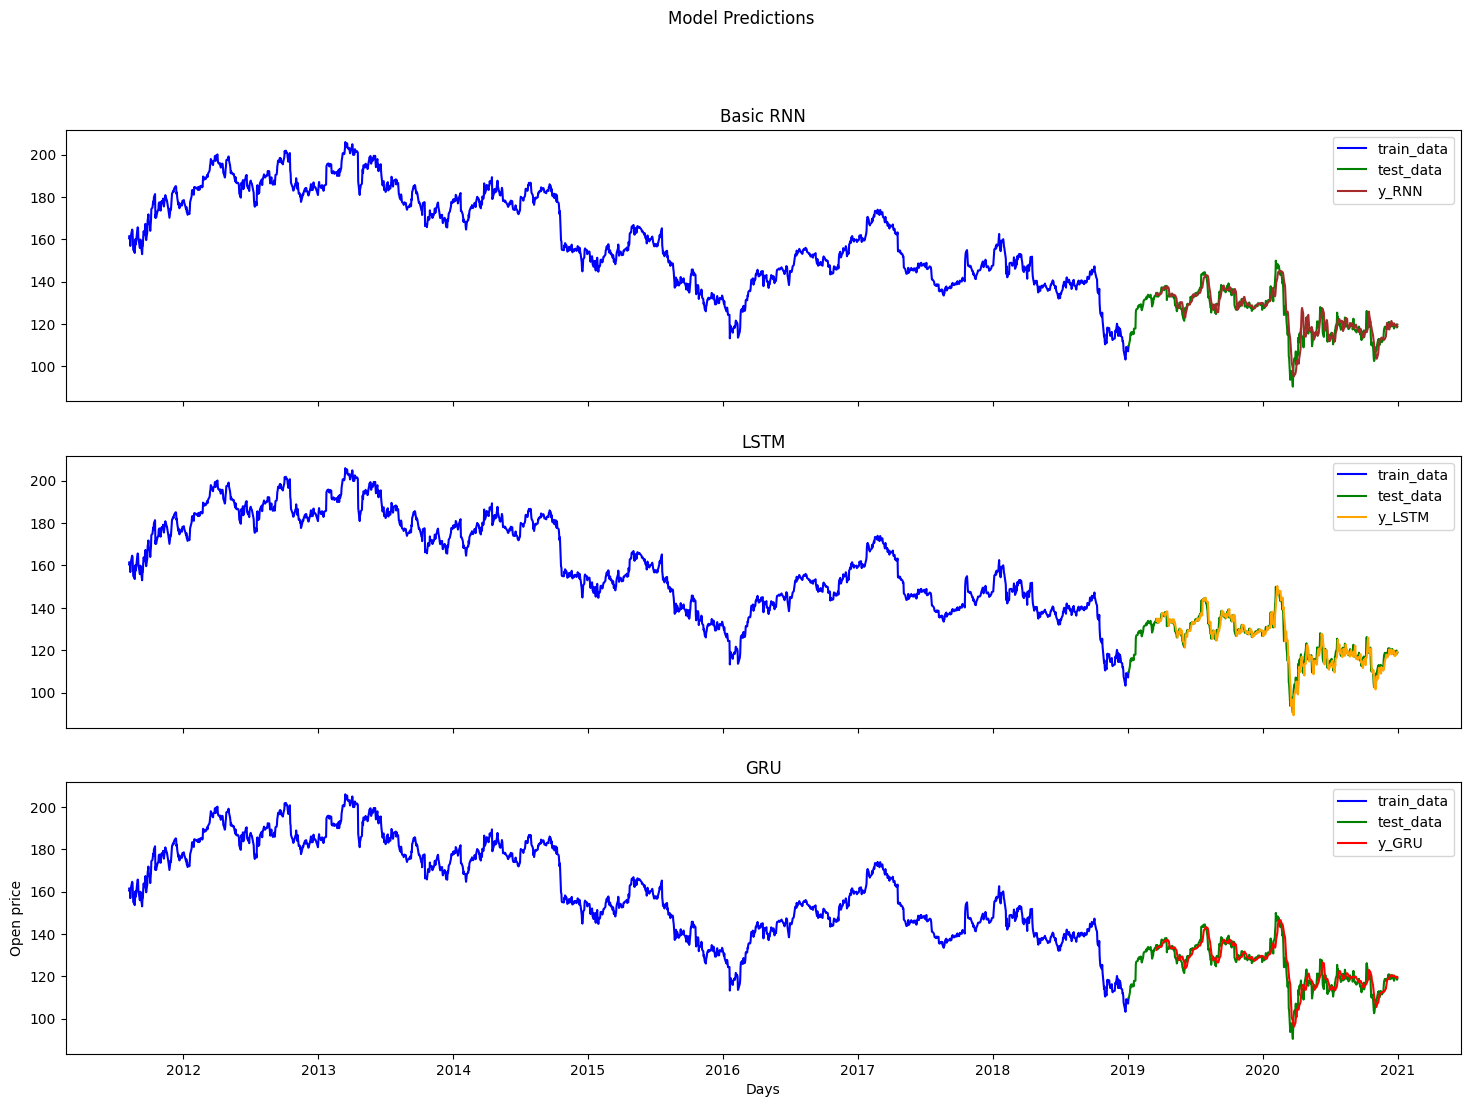

In [42]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[51:], y_RNN_O[:,0], label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[51:], y_LSTM_O[:,0], label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[51:], y_GRU_O[:,0], label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [43]:
from sklearn.metrics import mean_squared_error

# Assuming 'Close' is the actual data and 'forecast' is the predicted data
mse = mean_squared_error(test_data[51:],y_LSTM_O[:,0] )

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.874592219885548
